# House Prices: Advanced Regression Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set(font="Product Sans")

## Data Collection

In [2]:
train_df=pd.read_csv('data/train.csv')

test_df=pd.read_csv('data/test.csv')

In [3]:
train_df.shape, test_df.shape

((1460, 81), (1459, 80))

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Cleaning/Preprocessing

### Handle Missing Values

In [6]:
train_df.isnull().sum()

for column, null_count in train_df.isnull().sum().items():
    print(f'{column}: {null_count}')

Id: 0
MSSubClass: 0
MSZoning: 0
LotFrontage: 259
LotArea: 0
Street: 0
Alley: 1369
LotShape: 0
LandContour: 0
Utilities: 0
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
Exterior1st: 0
Exterior2nd: 0
MasVnrType: 8
MasVnrArea: 8
ExterQual: 0
ExterCond: 0
Foundation: 0
BsmtQual: 37
BsmtCond: 37
BsmtExposure: 38
BsmtFinType1: 37
BsmtFinSF1: 0
BsmtFinType2: 38
BsmtFinSF2: 0
BsmtUnfSF: 0
TotalBsmtSF: 0
Heating: 0
HeatingQC: 0
CentralAir: 0
Electrical: 1
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 0
BsmtHalfBath: 0
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
KitchenQual: 0
TotRmsAbvGrd: 0
Functional: 0
Fireplaces: 0
FireplaceQu: 690
GarageType: 81
GarageYrBlt: 81
GarageFinish: 81
GarageCars: 0
GarageArea: 0
GarageQual: 81
GarageCond: 81
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
Pool

In [7]:
test_df.isnull().sum()

for column, null_count in test_df.isnull().sum().items():
    print(f'{column}: {null_count}')

Id: 0
MSSubClass: 0
MSZoning: 4
LotFrontage: 227
LotArea: 0
Street: 0
Alley: 1352
LotShape: 0
LandContour: 0
Utilities: 2
LotConfig: 0
LandSlope: 0
Neighborhood: 0
Condition1: 0
Condition2: 0
BldgType: 0
HouseStyle: 0
OverallQual: 0
OverallCond: 0
YearBuilt: 0
YearRemodAdd: 0
RoofStyle: 0
RoofMatl: 0
Exterior1st: 1
Exterior2nd: 1
MasVnrType: 16
MasVnrArea: 15
ExterQual: 0
ExterCond: 0
Foundation: 0
BsmtQual: 44
BsmtCond: 45
BsmtExposure: 44
BsmtFinType1: 42
BsmtFinSF1: 1
BsmtFinType2: 42
BsmtFinSF2: 1
BsmtUnfSF: 1
TotalBsmtSF: 1
Heating: 0
HeatingQC: 0
CentralAir: 0
Electrical: 0
1stFlrSF: 0
2ndFlrSF: 0
LowQualFinSF: 0
GrLivArea: 0
BsmtFullBath: 2
BsmtHalfBath: 2
FullBath: 0
HalfBath: 0
BedroomAbvGr: 0
KitchenAbvGr: 0
KitchenQual: 1
TotRmsAbvGrd: 0
Functional: 2
Fireplaces: 0
FireplaceQu: 730
GarageType: 76
GarageYrBlt: 78
GarageFinish: 78
GarageCars: 1
GarageArea: 1
GarageQual: 78
GarageCond: 78
PavedDrive: 0
WoodDeckSF: 0
OpenPorchSF: 0
EnclosedPorch: 0
3SsnPorch: 0
ScreenPorch: 0
Po

<Axes: >

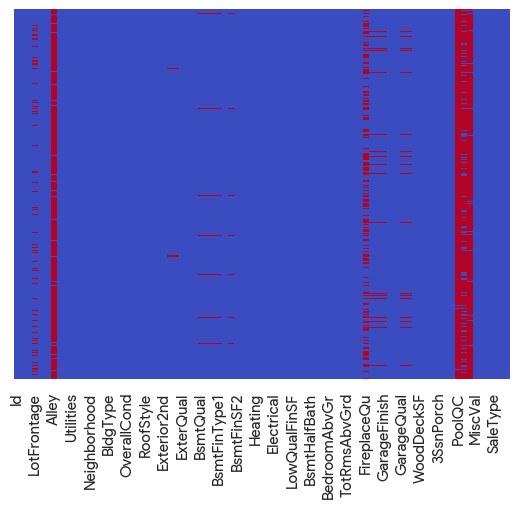

In [8]:
# cbar=False means that there will be no colorbar on the side of the plot.
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

<Axes: >

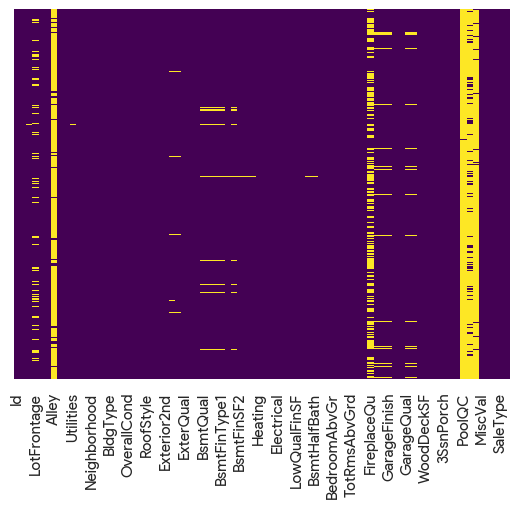

In [9]:
sns.heatmap(test_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
test_df['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [12]:
# In a DataFrame, axis=0 refers to the row axis and axis=1 refers to the column axis.
# If inplace=True, the operation will modify the DataFrame directly and won't return anything. 
# If inplace=False, which is the default, the operation will return a new DataFrame that is a 
# copy of the old one but with the changes applied.
train_df.drop(['Alley'],axis=1,inplace=True)
train_df.drop(['GarageYrBlt'],axis=1,inplace=True)
train_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
train_df.drop(['Id'],axis=1,inplace=True)

test_df.drop(['Alley'],axis=1,inplace=True)
test_df.drop(['GarageYrBlt'],axis=1,inplace=True)
test_df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
test_df.drop(['Id'],axis=1,inplace=True)

In [13]:
train_df['LotFrontage']=train_df['LotFrontage'].fillna(train_df['LotFrontage'].mean())

test_df['LotFrontage']=test_df['LotFrontage'].fillna(test_df['LotFrontage'].mean())
test_df['BsmtFinSF1']=test_df['BsmtFinSF1'].fillna(test_df['BsmtFinSF1'].mean())
test_df['BsmtFinSF2']=test_df['BsmtFinSF2'].fillna(test_df['BsmtFinSF2'].mean())
test_df['BsmtUnfSF']=test_df['BsmtUnfSF'].fillna(test_df['BsmtUnfSF'].mean())
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].mean())
test_df['GarageCars']=test_df['GarageCars'].fillna(test_df['GarageCars'].mean())
test_df['GarageArea']=test_df['GarageArea'].fillna(test_df['GarageArea'].mean())

In [14]:
# mode()[0] refers to the first mode of the 'MSZoning' column in the test_df DataFrame
train_df['BsmtCond']=train_df['BsmtCond'].fillna(train_df['BsmtCond'].mode()[0])
train_df['BsmtQual']=train_df['BsmtQual'].fillna(train_df['BsmtQual'].mode()[0])
train_df['FireplaceQu']=train_df['FireplaceQu'].fillna(train_df['FireplaceQu'].mode()[0])
train_df['GarageType']=train_df['GarageType'].fillna(train_df['GarageType'].mode()[0])
train_df['GarageFinish']=train_df['GarageFinish'].fillna(train_df['GarageFinish'].mode()[0])
train_df['GarageQual']=train_df['GarageQual'].fillna(train_df['GarageQual'].mode()[0])
train_df['GarageCond']=train_df['GarageCond'].fillna(train_df['GarageCond'].mode()[0])
train_df['MasVnrType']=train_df['MasVnrType'].fillna(train_df['MasVnrType'].mode()[0])
train_df['MasVnrArea']=train_df['MasVnrArea'].fillna(train_df['MasVnrArea'].mode()[0])
train_df['BsmtExposure']=train_df['BsmtExposure'].fillna(train_df['BsmtExposure'].mode()[0])
train_df['BsmtFinType1']=train_df['BsmtFinType1'].fillna(train_df['BsmtFinType1'].mode()[0])
train_df['BsmtFinType2']=train_df['BsmtFinType2'].fillna(train_df['BsmtFinType2'].mode()[0])

test_df['MSZoning']=test_df['MSZoning'].fillna(test_df['MSZoning'].mode()[0])
test_df['BsmtCond']=test_df['BsmtCond'].fillna(test_df['BsmtCond'].mode()[0])
test_df['BsmtQual']=test_df['BsmtQual'].fillna(test_df['BsmtQual'].mode()[0])
test_df['FireplaceQu']=test_df['FireplaceQu'].fillna(test_df['FireplaceQu'].mode()[0])
test_df['GarageType']=test_df['GarageType'].fillna(test_df['GarageType'].mode()[0])
test_df['GarageFinish']=test_df['GarageFinish'].fillna(test_df['GarageFinish'].mode()[0])
test_df['GarageQual']=test_df['GarageQual'].fillna(test_df['GarageQual'].mode()[0])
test_df['GarageCond']=test_df['GarageCond'].fillna(test_df['GarageCond'].mode()[0])
test_df['MasVnrType']=test_df['MasVnrType'].fillna(test_df['MasVnrType'].mode()[0])
test_df['MasVnrArea']=test_df['MasVnrArea'].fillna(test_df['MasVnrArea'].mode()[0])
test_df['BsmtExposure']=test_df['BsmtExposure'].fillna(test_df['BsmtExposure'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFinType2']=test_df['BsmtFinType2'].fillna(test_df['BsmtFinType2'].mode()[0])
test_df['Utilities']=test_df['Utilities'].fillna(test_df['Utilities'].mode()[0])
test_df['Exterior1st']=test_df['Exterior1st'].fillna(test_df['Exterior1st'].mode()[0])
test_df['Exterior2nd']=test_df['Exterior2nd'].fillna(test_df['Exterior2nd'].mode()[0])
test_df['BsmtFinType1']=test_df['BsmtFinType1'].fillna(test_df['BsmtFinType1'].mode()[0])
test_df['BsmtFullBath']=test_df['BsmtFullBath'].fillna(test_df['BsmtFullBath'].mode()[0])
test_df['BsmtHalfBath']=test_df['BsmtHalfBath'].fillna(test_df['BsmtHalfBath'].mode()[0])
test_df['KitchenQual']=test_df['KitchenQual'].fillna(test_df['KitchenQual'].mode()[0])
test_df['Functional']=test_df['Functional'].fillna(test_df['Functional'].mode()[0])
test_df['SaleType']=test_df['SaleType'].fillna(test_df['SaleType'].mode()[0])

In [15]:
train_df.dropna(inplace=True)

test_df.dropna(inplace=True)

In [16]:
train_df.shape, test_df.shape

((1459, 75), (1459, 74))

### Handle Categorical Features

In [17]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [18]:
def category_onehot_multcols(multcolumns):
    df_final=final_df
    i=0
    
    for fields in multcolumns:
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [19]:
final_df=pd.concat([train_df,test_df],axis=0)

In [20]:
final_df.shape

(2918, 75)

In [21]:
final_df=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [22]:
final_df.shape

(2918, 236)

In [23]:
final_df=final_df.loc[:,~final_df.columns.duplicated()]

In [24]:
final_df.shape

(2918, 176)

In [25]:
final_df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [26]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [27]:
df_Test = df_Test.drop(['SalePrice'], axis=1)